In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [117]:
df=pd.read_csv('avacado.csv')

In [118]:
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [119]:
df.shape

(16468, 14)

In [120]:
df.columns

Index(['No.', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [121]:
df.dtypes

No.             float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No.           1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [123]:
df.describe()

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601820e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433164e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,9.811420e+03,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


skewness and outliers are  present in XLarge Bags column.

In [124]:
df.isnull()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16464,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16465,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16466,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [125]:
df.isnull().sum()

No.             14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Null values are present highly in all columns.

In [126]:
df.shape

(16468, 14)

we need to remove na values.

In [127]:
df=df.dropna()

In [128]:
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [129]:
df.shape

(1517, 14)

after removing na values shape is changed from 16468 into 1517 .

In [130]:
df.isnull().sum()

No.             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values.

In [131]:
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [132]:
df.isnull().sum()

No.             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [133]:
df_cor=df.corr()

In [134]:
df_cor

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
No.,1.000000,-0.075531,0.091951,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140466,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091951,-0.140466,1.000000,0.985568,0.987154,0.934347,0.967690,0.960642,0.910226,0.521718,-0.004183
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967690,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521718,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


AveragePrice is highly correlate with the year and least correlate with 4046 column.

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])

In [136]:
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


we need to drop Date columns from a dataframe.

In [137]:
df.drop('Date',axis=1,inplace=True)

In [138]:
df.head()

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


In [139]:
df_cor=df.corr()
df_cor

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
No.,1.000000,-0.075531,0.091951,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
AveragePrice,-0.075531,1.000000,-0.140466,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091951,-0.140466,1.000000,0.985568,0.987154,0.934347,0.967690,0.960642,0.910226,0.521718,NaN,-0.004183,0.236596
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.111597,0.967690,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.050993,-0.048284,0.521718,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


In [140]:
df.describe()

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,1.074990,1.601820e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,0.188891,4.433164e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,9.811420e+03,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


<AxesSubplot:>

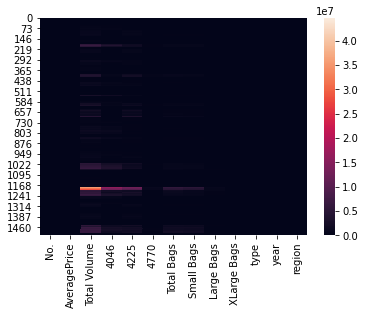

In [141]:
sns.heatmap(df)

No Null values present.

<AxesSubplot:>

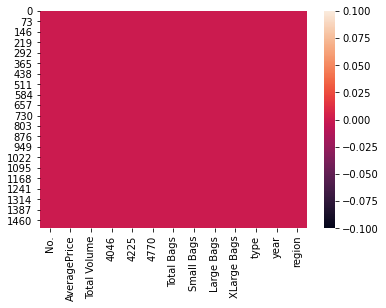

In [142]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

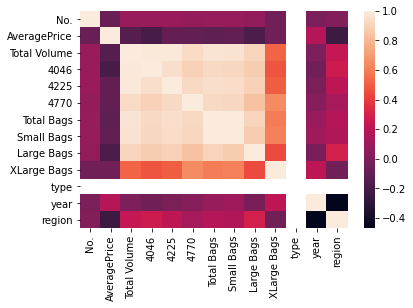

In [143]:
sns.heatmap(df_cor)

AveragePrice is highly correlate with year and least correlate with region.

<AxesSubplot:>

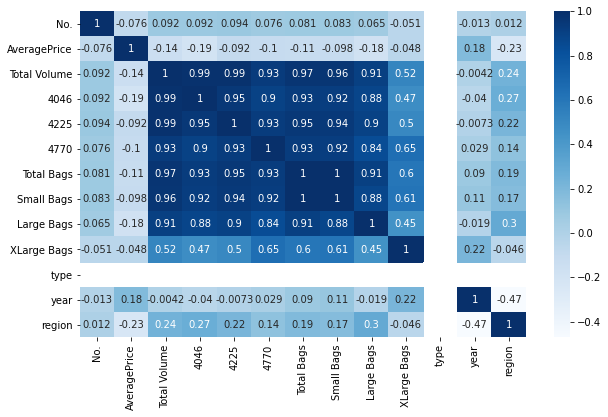

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Average price is highly correlate with year and least correlate with region.

<AxesSubplot:>

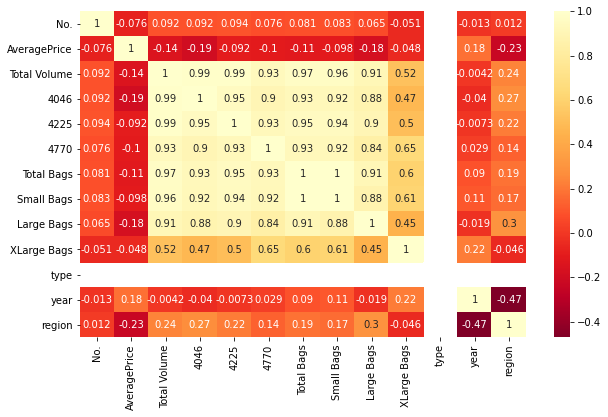

In [145]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

Average price is highly correlate with year and least correlate with region.

In [146]:
df.columns

Index(['No.', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

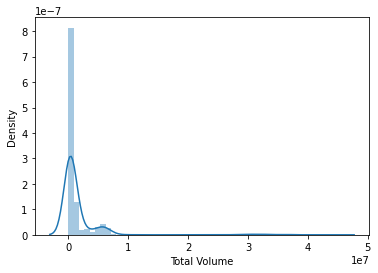

In [147]:
sns.distplot(df['Total Volume'])

skewness present.

<AxesSubplot:xlabel='4046', ylabel='Density'>

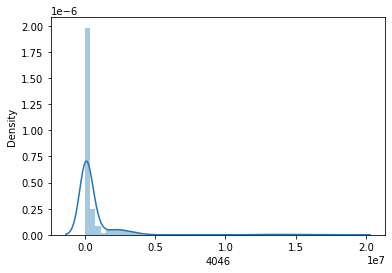

In [148]:
sns.distplot(df['4046'])

skewness present.

<AxesSubplot:xlabel='4225', ylabel='Density'>

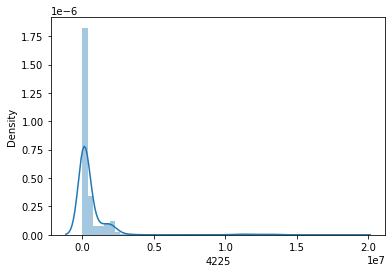

In [149]:
sns.distplot(df['4225'])

skewness present.

<AxesSubplot:xlabel='4770', ylabel='Density'>

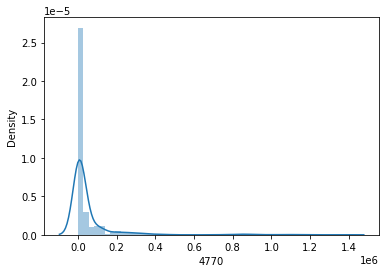

In [150]:
sns.distplot(df['4770'])

skewness present.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

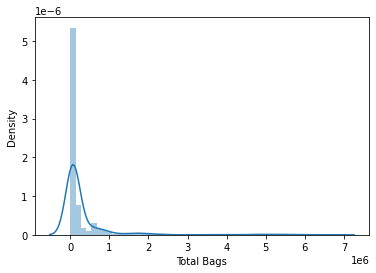

In [151]:
sns.distplot(df['Total Bags'])

skewness present.

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

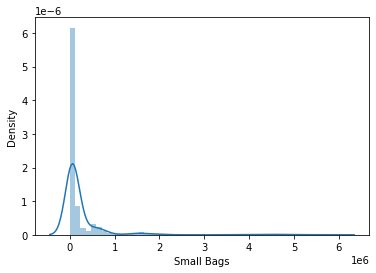

In [152]:
sns.distplot(df['Small Bags'])

skewness present.

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

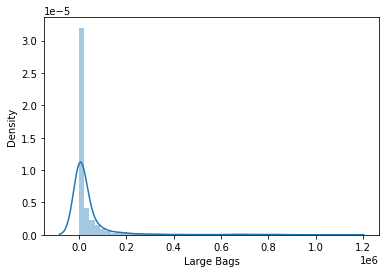

In [153]:
sns.distplot(df['Large Bags'])

skewness present.

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

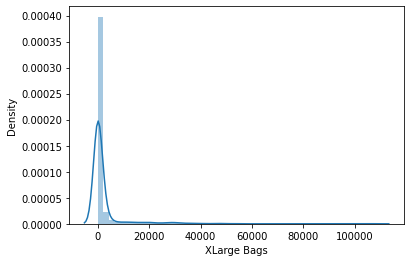

In [154]:
sns.distplot(df['XLarge Bags'])

skewness present.

<AxesSubplot:xlabel='type', ylabel='Density'>

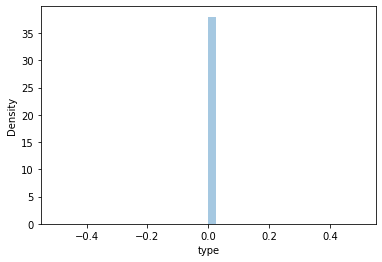

In [155]:
sns.distplot(df['type'])

<AxesSubplot:xlabel='year', ylabel='Density'>

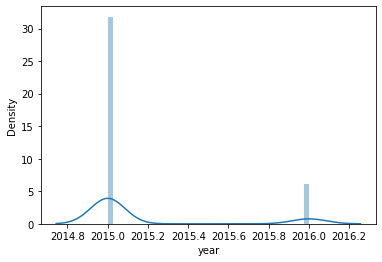

In [156]:
sns.distplot(df['year'])

skewness present.

<AxesSubplot:xlabel='region', ylabel='Density'>

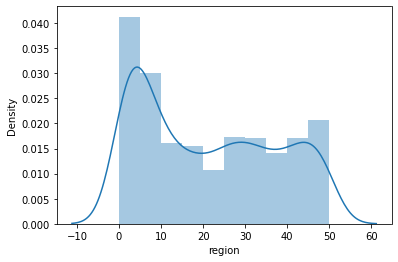

In [157]:
sns.distplot(df['region'])

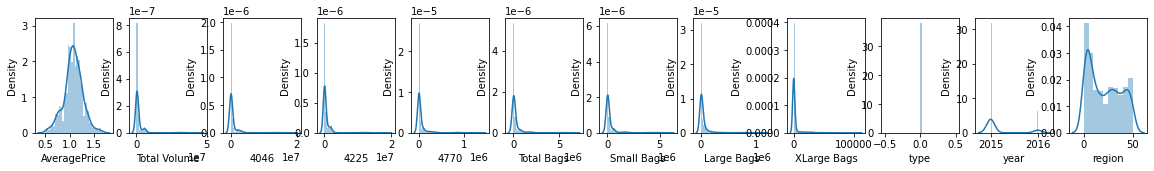

In [158]:
collist=df.columns.values
ncol=15
nrows=10
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

skewness present in Total volume,4046,4255,4770,TotalBags,SmallBags,LargeBags and XLarge Bags.

In [159]:
df.columns

Index(['No.', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

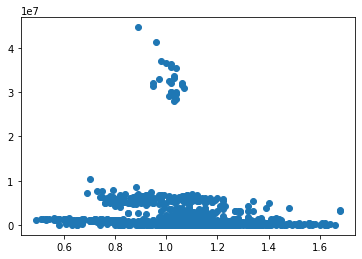

In [160]:
plt.scatter(df['AveragePrice'],df['Total Volume'])

Total Volume lies mainly lower part of scatterplot.

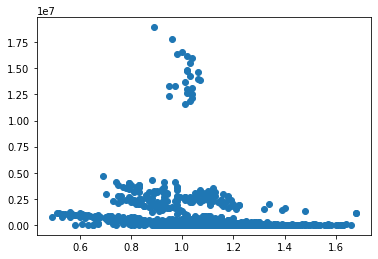

In [161]:
plt.scatter(df['AveragePrice'],df['4046'])

4046 lies mainly lower part of scatterplot.

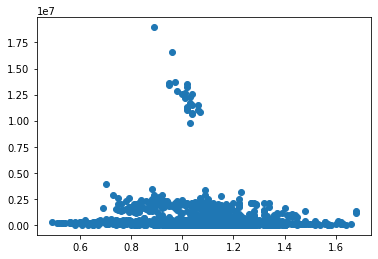

In [162]:
plt.scatter(df['AveragePrice'],df['4225'])

4225 lies mainly lower part of scatterplot.

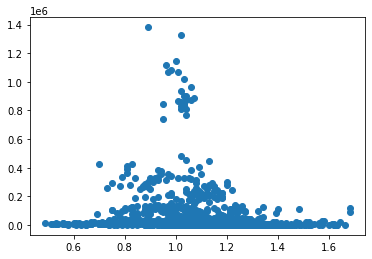

In [163]:
plt.scatter(df['AveragePrice'],df['4770'])

4770 lies mainly lower part of scatterplot.

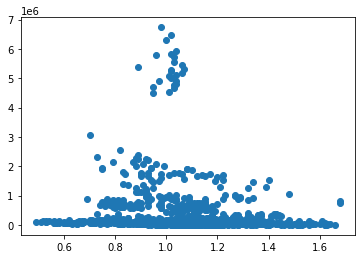

In [164]:
plt.scatter(df['AveragePrice'],df['Total Bags'])


Total Bags lies mainly lower part of scatterplot.

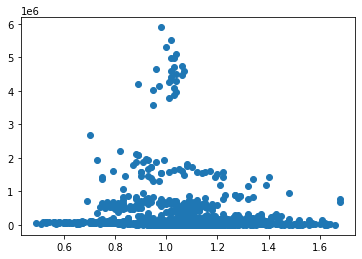

In [165]:
plt.scatter(df['AveragePrice'],df['Small Bags'])

Small Bags lies mainly lower part of scatterplot.

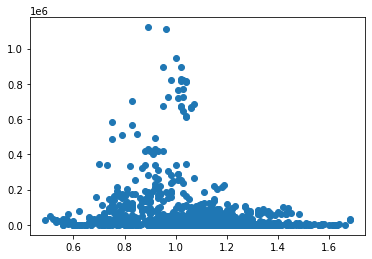

In [166]:
plt.scatter(df['AveragePrice'],df['Large Bags'])

Large Bags lies mainly lower part of scatterplot.

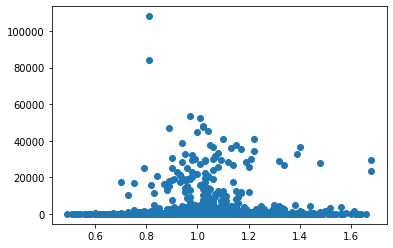

In [167]:
plt.scatter(df['AveragePrice'],df['XLarge Bags'])

XLarge Bags lies mainly lower part of scatterplot.

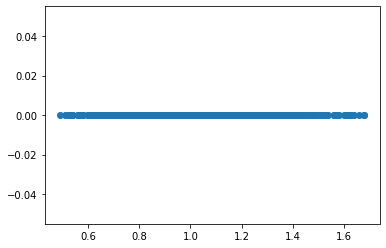

In [168]:
plt.scatter(df['AveragePrice'],df['type'])

type is mainly 0.00 type.

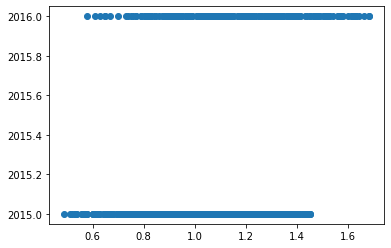

In [169]:
plt.scatter(df['AveragePrice'],df['year'])

2015.0 and 2016.0 year only.

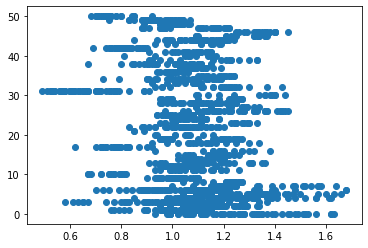

In [170]:
plt.scatter(df['AveragePrice'],df['region'])

region scattered of whole part of scatterplot.

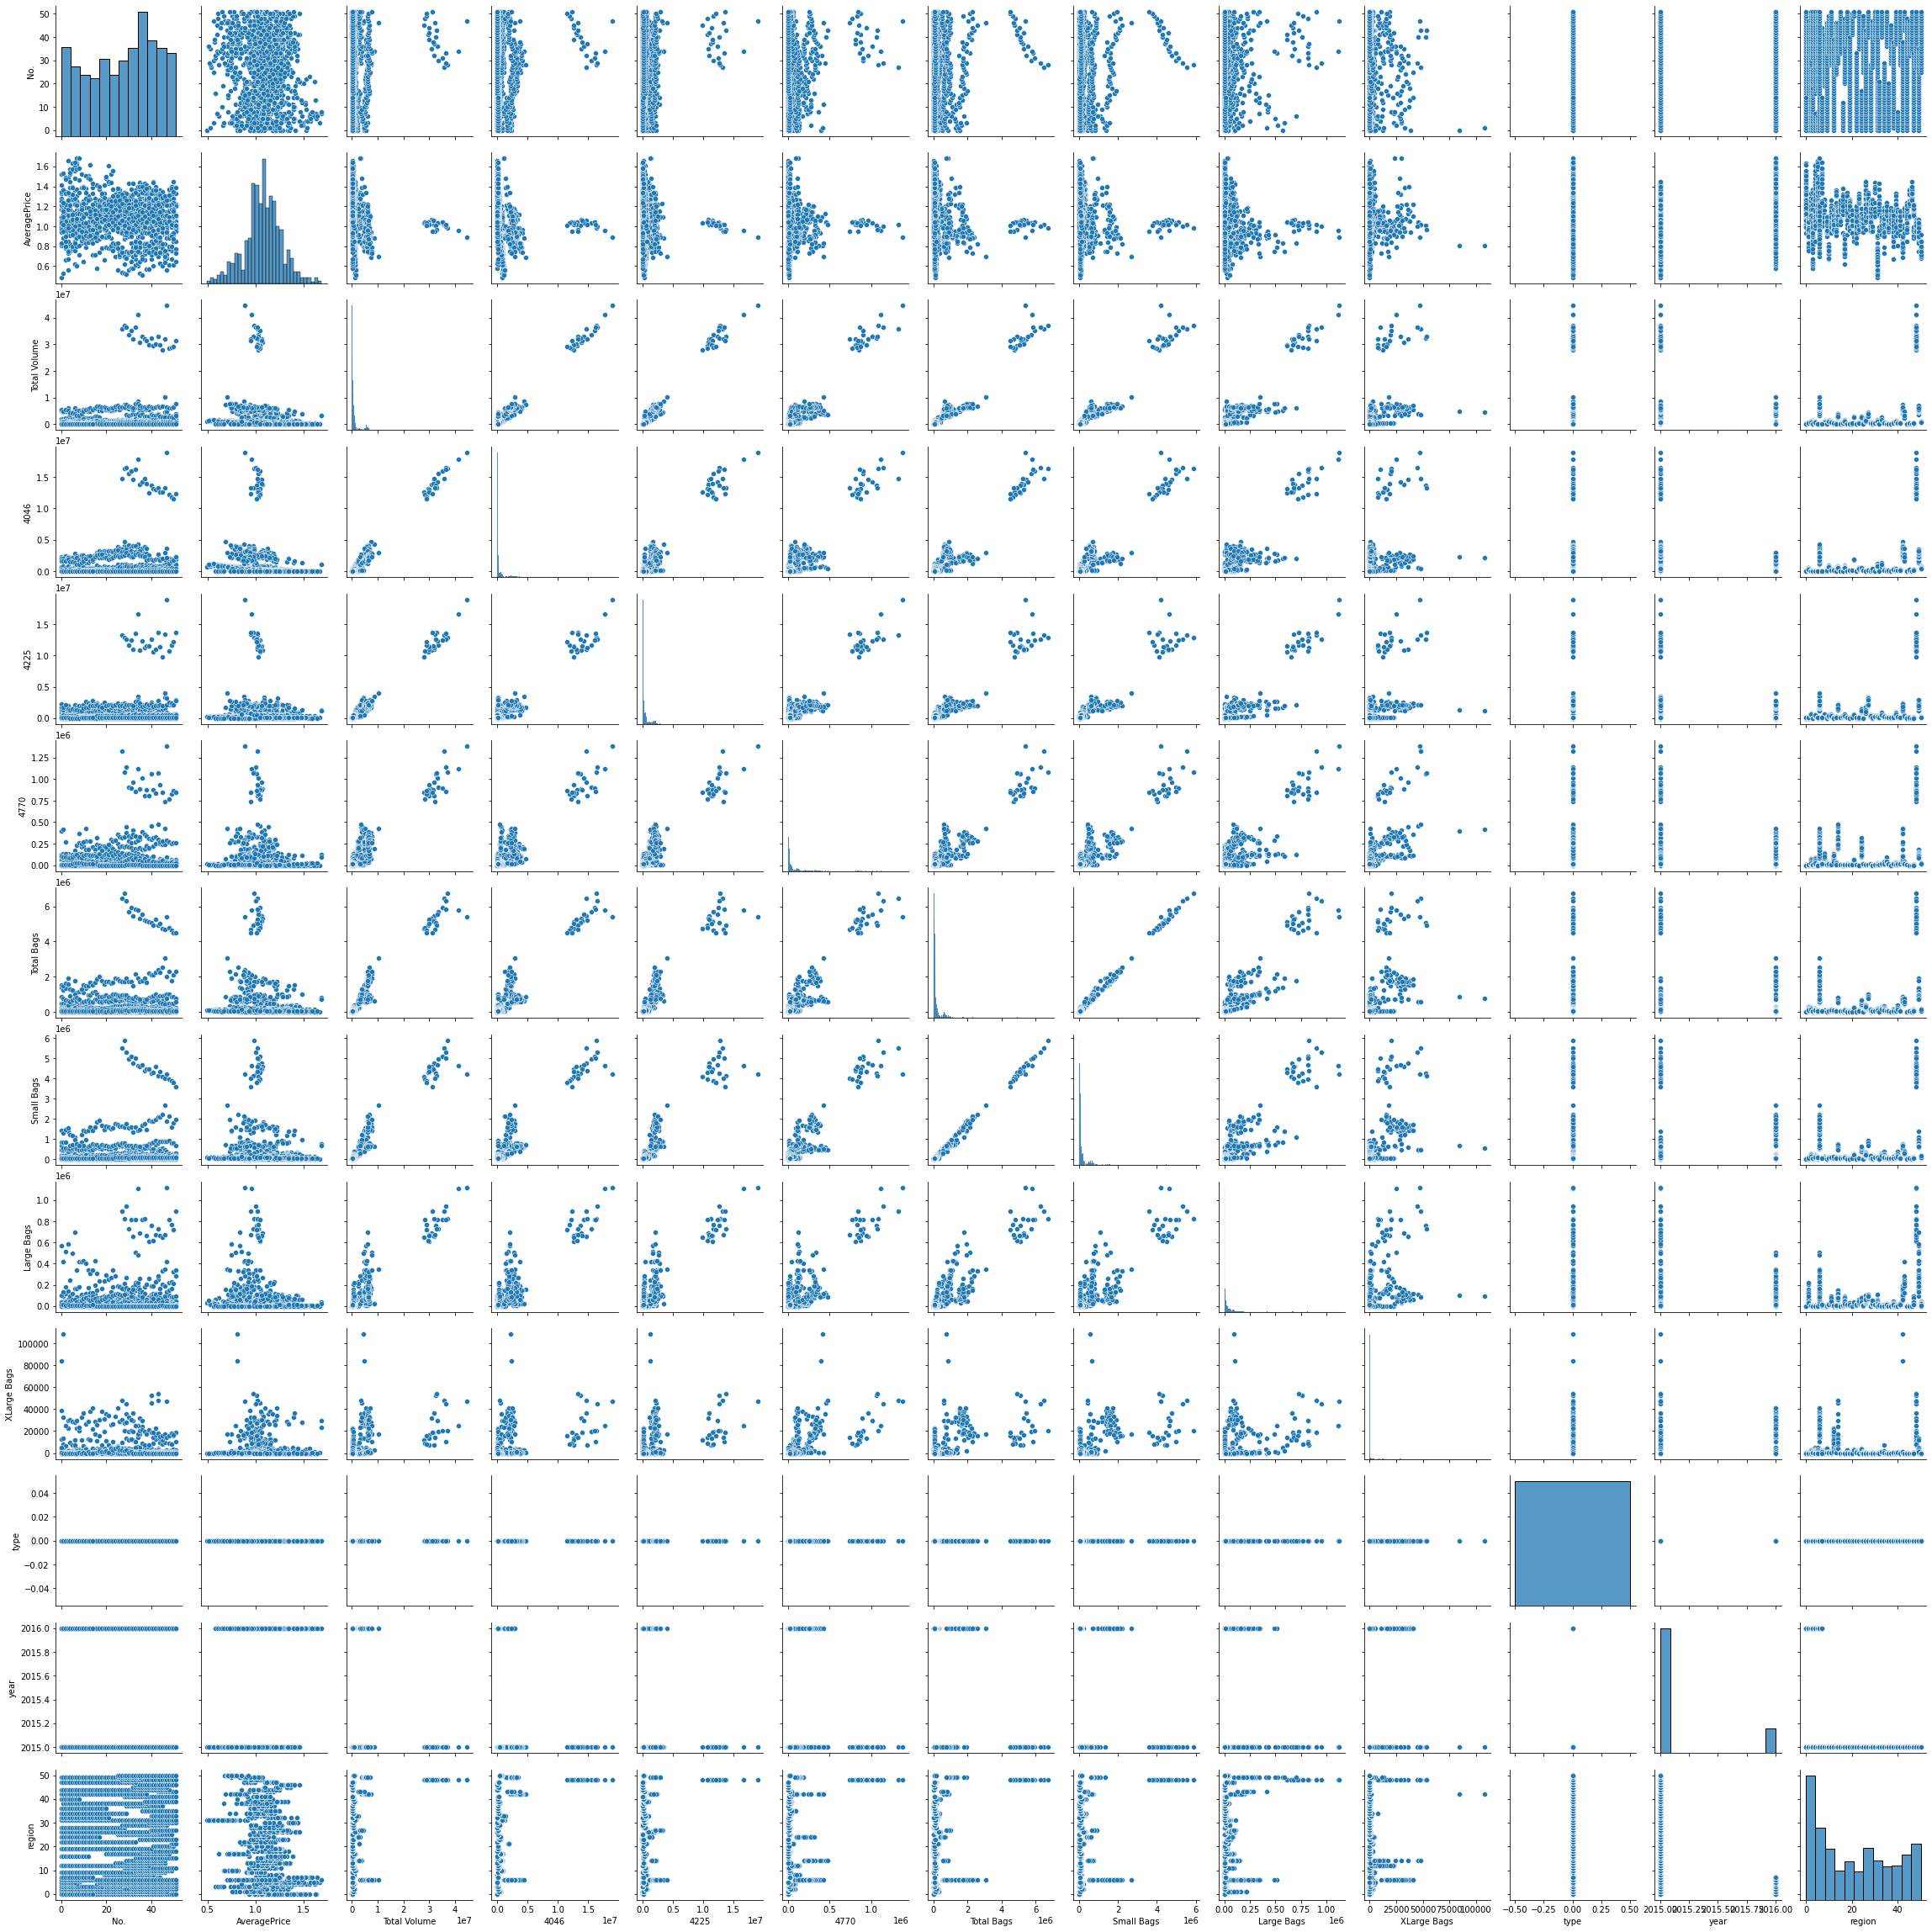

In [171]:
sns.pairplot(df)

In [172]:
df.skew()

No.            -0.234824
AveragePrice   -0.109444
Total Volume    6.200086
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

skewness present in Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags and Year.

# Removing skewness

In [173]:
df['Total Volume']=np.log1p(df['Total Volume'])

In [174]:
df['4046']=np.log1p(df['4046'])

In [175]:
df['4225']=np.log1p(df['4225'])

In [176]:
df['4770']=np.log1p(df['4770'])

In [177]:
df['Total Bags']=np.log1p(df['Total Bags'])

In [178]:
df['Small Bags']=np.log1p(df['Small Bags'])

In [179]:
df['Large Bags']=np.log1p(df['Large Bags'])

In [180]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])

In [181]:
df['Year']=np.log1p(df['year'])

In [182]:
df.skew()

No.            -0.234824
AveragePrice   -0.109444
Total Volume    0.655067
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
Year            1.828332
dtype: float64

<AxesSubplot:>

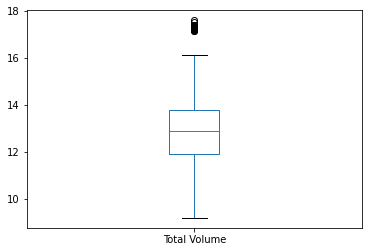

In [183]:
df['Total Volume'].plot.box()

outliers are present

<AxesSubplot:>

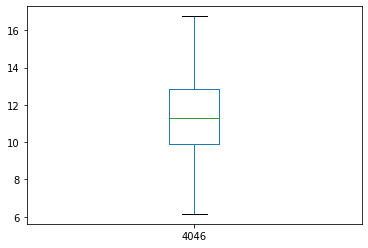

In [185]:
df['4046'].plot.box()

No outliers are present.

<AxesSubplot:>

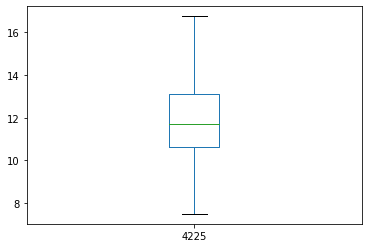

In [186]:
df['4225'].plot.box()

No outliers present.

<AxesSubplot:>

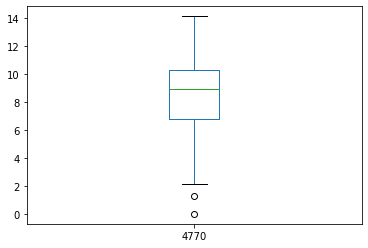

In [187]:
df['4770'].plot.box()

outliers are present

<AxesSubplot:>

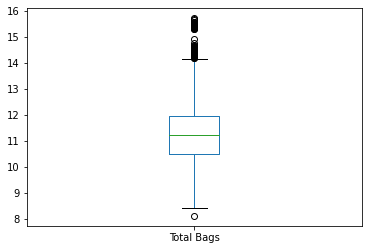

In [188]:
df['Total Bags'].plot.box()

outliers are present.

<AxesSubplot:>

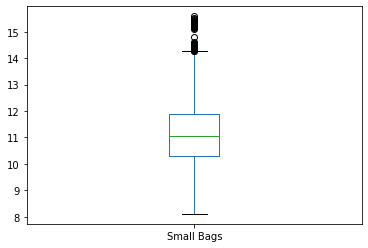

In [189]:
df['Small Bags'].plot.box()

outliers are present.

<AxesSubplot:>

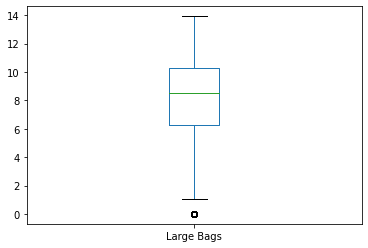

In [190]:
df['Large Bags'].plot.box()

outliers present.

<AxesSubplot:>

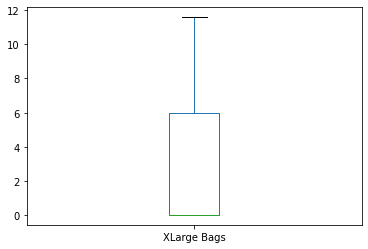

In [191]:
df['XLarge Bags'].plot.box()

No outliers present.

<AxesSubplot:>

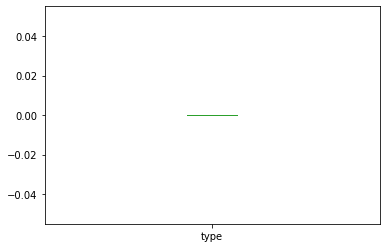

In [192]:
df['type'].plot.box()

No outliers are present.

<AxesSubplot:>

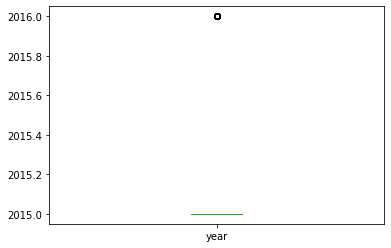

In [193]:
df['year'].plot.box()

outliers present.

<AxesSubplot:>

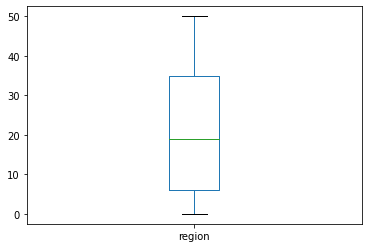

In [194]:
df['region'].plot.box()

No outliers are present.

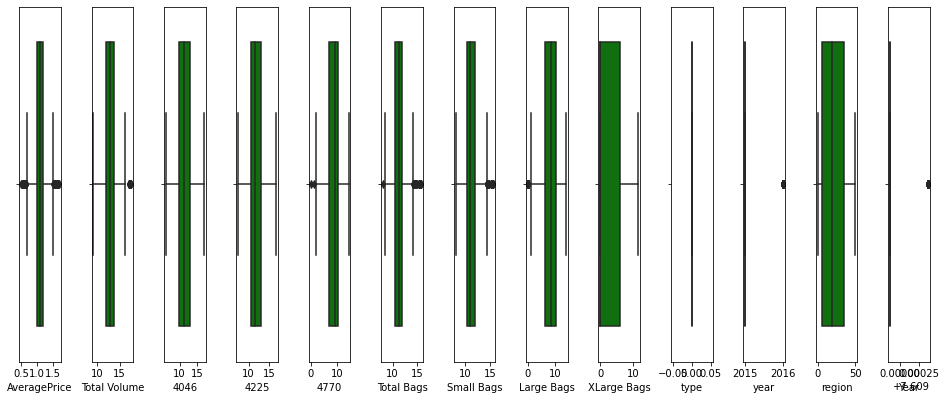

In [195]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Average Price,Total Volume,4770,Total Bags,Small Bags,Large Bags,year and Year has outliers.

In [196]:
df.head()

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,0.0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015.0,0,7.608871
1,1.0,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015.0,0,7.608871
2,2.0,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015.0,0,7.608871
3,3.0,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015.0,0,7.608871
4,4.0,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015.0,0,7.608871


# Removing outliers

In [197]:
df.head()

,No.,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,0.0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015.0,0,7.608871
1,1.0,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015.0,0,7.608871
2,2.0,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015.0,0,7.608871
3,3.0,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015.0,0,7.608871
4,4.0,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015.0,0,7.608871


In [198]:
df.drop('No.',axis=1,inplace=True)

In [199]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015.0,0,7.608871
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015.0,0,7.608871
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015.0,0,7.608871
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015.0,0,7.608871
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015.0,0,7.608871


In [200]:
from scipy.stats import zscore
z=np.abs(zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Year']]))
print(np.where(z<3))


(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))


In [201]:
z[760][1]

0.6438590297274467

In [202]:
z[1182][2]

2.2630522017411505

In [203]:
df_new=df[(z<3).all(axis=1)]

In [204]:
df_new.shape

(1502, 13)

In [205]:
df.shape

(1517, 13)

1517-1502=15 outliers removed from the Dataframe.

In [206]:
x=df_new.iloc[:,1:13]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,2015.0,0,7.608871
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,2015.0,0,7.608871
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,2015.0,0,7.608871
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,2015.0,0,7.608871
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,2015.0,0,7.608871
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0,2016.0,7,7.609367
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0,2016.0,7,7.609367
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0,2016.0,7,7.609367
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0,2016.0,7,7.609367


In [207]:
y=df_new.iloc[:,0]
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1502, dtype: float64

In [208]:
lr=LinearRegression()

In [209]:
def getScore(m):
    max_score=0
    max_i=0
   
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        rscore=r2_score(y_test,pred)
        if(rscore>max_score):
            max_score=rscore
            max_i=i
    print("max r2 score",max_score)
    print("max i",max_i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=max_i)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


In [210]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)
lr=LinearRegression()
getScore(lr)

max r2 score 0.44405071703167576
max i 157
mean absolute error: 0.10937273856175128
mean squared error 0.020549217520594625
Root Mean Squared Error: 0.14334998263199972


In [211]:
lr.coef_

array([-1.61246627e-01, -1.17497769e-02,  4.38576239e-02, -1.25426773e-02,
       -6.44242381e-02,  1.69254807e-01,  6.58156724e-03,  1.54163547e-03,
       -5.55111512e-17, -2.87209173e-02, -1.25962897e-03, -1.42429545e-05])

In [212]:
lr.intercept_

59.57983063676107

# Regularization :: L1 and L2 Regularization¶

In [213]:
from sklearn.linear_model  import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.39013097167887545

In [214]:
ls.coef_

array([-0.18168546, -0.00847862,  0.06112811, -0.01475948, -0.09623335,
        0.19276597,  0.01001466,  0.00304087,  0.        , -0.0075844 ,
       -0.00121511, -0.        ])

In [215]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.39017933414722983

In [216]:
rd.coef_

array([-1.83493666e-01, -7.99739887e-03,  6.18610852e-02, -1.50029648e-02,
       -1.02989062e-01,  1.99623186e-01,  1.03753499e-02,  3.13589029e-03,
        0.00000000e+00, -8.71457237e-03, -1.22537902e-03, -4.32163274e-06])

In [217]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.39016369438972665


array([-0.18240566, -0.00828663,  0.0614234 , -0.01486714, -0.09915819,
        0.19571749,  0.0101694 ,  0.00308438,  0.        , -0.00813356,
       -0.00121992, -0.        ])

# Cross validation

In [218]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean(),score.std())

[-0.35159853  0.1370808   0.37259898  0.2101346   0.14710359]
0.10306388653810232 0.24245736147784713


# Ensemble Techniques

In [219]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.7769217061379734
0.00709587945564516


In [220]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(r2_score(y_test,predab))
print(mean_squared_error(y_test,predab))

0.6151745372738758
0.012240882103286855


# Saving the Model

we will save the linear regression object.

In [221]:
import joblib
joblib.dump(lr,"avacado.obj")

['avacado.obj']

In [222]:
file=joblib.load('avacado.obj')

In [223]:
file.predict(x_test)

array([1.04159899, 0.93456222, 1.04710533, 1.00767631, 1.21513142,
       1.04626417, 0.92764268, 0.94784492, 1.0473744 , 1.1191675 ,
       1.18943391, 1.06447816, 1.04686544, 1.13930535, 1.08934482,
       1.0420357 , 1.15140557, 1.16437338, 1.03455481, 1.00443209,
       1.03589415, 0.96531682, 1.12642625, 1.1371905 , 1.04773148,
       0.93216835, 1.16306263, 1.12033065, 1.12137446, 1.2125656 ,
       0.99702502, 1.23821218, 1.20473931, 1.135551  , 1.01134455,
       1.02521689, 1.11909853, 1.06961801, 1.18759602, 1.288531  ,
       1.17670104, 1.28122122, 0.99722135, 1.04780386, 1.09933183,
       1.16438341, 1.04914335, 0.94788912, 1.09812758, 0.8855781 ,
       1.2616002 , 0.98144862, 1.20075675, 0.91175892, 1.12292341,
       1.24883323, 1.00537784, 1.13869155, 1.14399799, 0.92580821,
       1.19935734, 1.0376118 , 1.16125653, 1.29165017, 1.03672107,
       0.95129219, 1.05484805, 1.07779052, 1.09965635, 1.14505747,
       1.13559001, 1.1456417 , 1.14686006, 1.16279951, 1.23477